# Prerequisites
conda install -c conda-forge python-igraph
conda install -c conda-forge plotly

# Content
This notebook uses tree data (structured as CSV) which is generated by Christian Koch:
* https://github.com/c4ristian/collatz/tree/v1.3.2
* https://github.com/c4ristian/collatz/blob/v1.3.2/collatz/graph.py
* https://github.com/c4ristian/collatz/blob/v1.3.2/tests/test_graph.py
* https://github.com/c4ristian/collatz/blob/v1.3.2/notebooks/dutch_graph.md

These trees are visualized using Plotly and igraph.

In [158]:
import pandas as pd
import igraph as ig

In [160]:
df = pd.read_csv("dutch_graph_t_0.csv", skip_blank_lines=True, header=0)
df.drop(df.columns[0], axis=1, inplace=True)
df['successor'] = df['successor'].astype(int)
df['predecessor'] = df['predecessor'].astype(int)

vertices = df['successor'].append(df['predecessor']).unique()
vertexMap = {}
for i, vertex in enumerate(vertices, start=0):
    vertexMap[vertex] = i
num_vertices = len(vertices)
num_edges = df.shape[0]

g2 = ig.Graph()
g2.add_vertices(vertices)

for i in range(num_vertices):
    g2.vs[i]["id"] = i
    g2.vs[i]["label"]= str(vertices[i])

for index, row in df.iterrows():
   predecessor_id = vertexMap[row['successor']]
   successor_id = vertexMap[row['predecessor']]
   g2.add_edge(predecessor_id, successor_id)



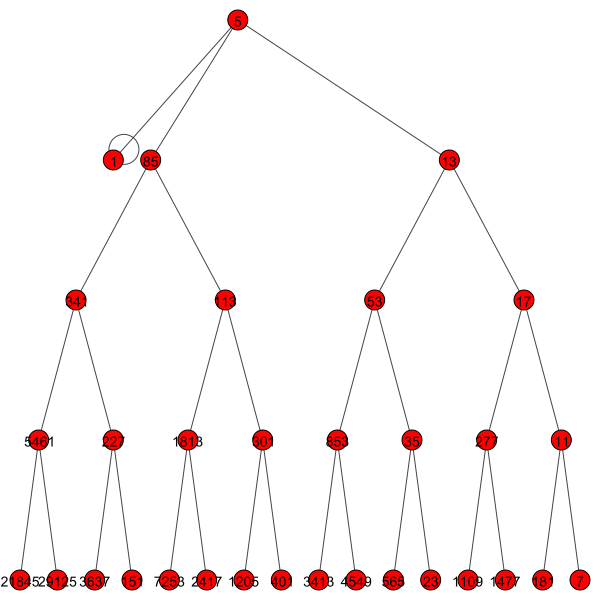

In [161]:
ig.plot(g2, layout="rt", labels=g2.vertex_attributes)

In [162]:
df.head(30)

,successor,predecessor,prunable
0,1,5,False
1,1,1,True
2,5,85,False
3,5,13,True
4,85,341,False
5,85,113,True
6,13,53,False
7,13,17,True
8,341,5461,False
9,341,227,True
